# Основы машинного обучения: лабораторная работа №1
## Задание 3. Знакомство с Pandas

В этом задании необходимо научиться базовым приемам работы с данными. Необходимо загрузить заданный по варианту датасет, провести разведочный анализ данных, сформулировать гипотезы о возможном значении всех полей в датасете, проверить эти гипотезы, и ответить на вопросы по данным. <!-- Если в конкретном задании не указано иное, проводить очистку данных (удаление пустых и невалидных значений) не нужно. -->

### Цель

Знакомство с разведочным анализом данных и применение Pandas для извлечения информации

### Оценивание и баллы

За это задание в общей сложности можно получить до 4 баллов. Задание частично проверяется автоматически, а частично будет оцениваться вручную. Чтобы получить максимальный балл,  необходимо успешно выполнить приведенные ниже задачи.

## Важные замечания

1. *Откройте этот файл в своем репозитории на GitHub и скопируйте адрес из адресной строки браузера. Перейдите в [Google Colab](https://colab.research.google.com/), выберите `Файл -> Открыть ноутбук -> GitHub`, вставьте скопированный URL и нажмите кнопку поиска (кнопка с лупой справа от поля ввода строки для поиска). В Google Colab откроется копия этого ноутбука из персонального репозитория на GitHub.*
2. *Не удаляйте и не изменяйте имена переменных в ячейках с кодом ниже. Можно добавлять в каждую ячейку произвольное количество строк кода, главное - сохранить результат решения задачи в предопределенную (-ые) переменную (-ые) в соответствующей ячейке. Если этого не сделать, автоматические тесты не будут пройдены.*
3. *Чтобы сохранить работу, выберите `Файл -> Сохранить копию на GitHub` и __вручную выберите правильный репозиторий из раскрывающегося списка__.*
4. *Если в процессе выполнения задания этот файл окажется испорчен, ознакомьтесь с инструкцией в ноутбуке [jupyter_assignment](jupyter_assignment.ipynb), раздел "Повторная сдача".*  


#### Задачи

#### 1. Определить номер варианта
Перейдите по ссылке из личного кабинета на Google Таблицу со списком студентов. Найдите свое ФИО в списке и запомните соответствующий порядковый номер (поле № п/п) в первом столбце. Заполните его в ячейке ниже и выполните ячейку. Если вы не можете найти себя в списке, обратитесь к своему преподавателю.

In [2]:
### BEGIN YOUR CODE

Student_ID = 13

### END YOUR CODE

Теперь выполните следующую ячейку. Она вычислит номер задания и выведет его.

In [3]:
datasets = [('Chipotle','https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'), ('US Air Carrier market in 2019','https://raw.githubusercontent.com/markpolyak/datasets/refs/heads/main/data/aircarrier_market_us_2019.zip'), ('Open Food Facts', 'https://raw.githubusercontent.com/markpolyak/datasets/refs/heads/main/data/en.openfoodfacts.org.products.tsv.tar.bz2')]

dataset_id = None if Student_ID is None else Student_ID % len(datasets)
if dataset_id is None:
    print("ОШИБКА! Не указан порядковый номер студента в списке группы.")
else:
    print(f"Датасет '{datasets[dataset_id][0]}' доступен по следующей ссылке: {datasets[dataset_id][1]}")
    print(f"В заданиях ниже, где нужно выбрать вопрос, всегда выбирайте вопрос № {dataset_id+1}")

Датасет 'US Air Carrier market in 2019' доступен по следующей ссылке: https://raw.githubusercontent.com/markpolyak/datasets/refs/heads/main/data/aircarrier_market_us_2019.zip
В заданиях ниже, где нужно выбрать вопрос, всегда выбирайте вопрос № 2


Скачайте датасет с помощью команды `!wget <dataset_url>`, где `<dataset_url>` необходимо заменить на ссылку на датасет, появившуюся после выполнения предыдущей ячейки. При необходимости разархивируйте датасет, используя команды `!unzip`, `!tar` и др.

*Примечание: в Jupyter-ноутбуке можно использовать любые команды командного интерпретатора bash. Для этого необходимо поставить в ячейке с кодом восклицательный знак `!`, после которого записать команду bash со всеми необходимыми аргументами. Результат выполнения этой команды bash будет возвращен в Jupyter и его можно использовать в коде на Python.*

In [4]:
### BEGIN YOUR CODE

!wget https://raw.githubusercontent.com/markpolyak/datasets/refs/heads/main/data/aircarrier_market_us_2019.zip

# !unzip ...
# !tar ...
# !gunzip ...

### END YOUR CODE

--2025-03-20 19:48:53--  https://raw.githubusercontent.com/markpolyak/datasets/refs/heads/main/data/aircarrier_market_us_2019.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10159563 (9.7M) [application/zip]
Saving to: ‘aircarrier_market_us_2019.zip’

aircarrier_market_u 100%[===================>]   9.69M  --.-KB/s    in 0.1s    

2025-03-20 19:48:54 (97.0 MB/s) - ‘aircarrier_market_us_2019.zip’ saved [10159563/10159563]



##### 2. Загрузите датасет в pandas.DataFrame, сохраните его в переменной `df`. Cконвертируйте названия столбцов в нижний регистр

In [6]:
import pandas as pd
import zipfile

zip_file_name = "aircarrier_market_us_2019.zip"


csv_file_name = ""


with zipfile.ZipFile(zip_file_name, 'r') as z:
    if not csv_file_name:
        csv_files = [f for f in z.namelist() if f.endswith('.csv')]
        if len(csv_files) == 1:
            csv_file_name = csv_files[0]
        elif len(csv_files) == 0:
            raise FileNotFoundError("No CSV file found")
        else:
             raise ValueError("")


    df = pd.read_csv(z.open(csv_file_name))


df.columns = df.columns.str.lower()


##### 3. Какие столбцы присутствуют в наборе данных? (0.1 балла)

In [7]:
columns = df.columns

print(columns)

Index(['passengers', 'freight', 'mail', 'distance', 'unique_carrier',
       'airline_id', 'unique_carrier_name', 'unique_carrier_entity', 'region',
       'carrier', 'carrier_name', 'carrier_group', 'carrier_group_new',
       'origin_airport_id', 'origin_airport_seq_id', 'origin_city_market_id',
       'origin', 'origin_city_name', 'origin_state_abr', 'origin_state_fips',
       'origin_state_nm', 'origin_country', 'origin_country_name',
       'origin_wac', 'dest_airport_id', 'dest_airport_seq_id',
       'dest_city_market_id', 'dest', 'dest_city_name', 'dest_state_abr',
       'dest_state_fips', 'dest_state_nm', 'dest_country', 'dest_country_name',
       'dest_wac', 'year', 'quarter', 'month', 'distance_group', 'class',
       'data_source'],
      dtype='object')


##### 4. Ответьте на вопрос и сохраните ответ в переменной `answer1` (0.1 балла)

Вопросы:
1. Какое блюдо (`item_name`) заказывали чаще всего?
2. Сколько авиаперевозчиков (`carrier`) представлены в датасете?
3. По скольким продуктам в датасете имеется информация о содержании аллергенов (`allergens`)?

In [8]:
answer1 = df['carrier'].nunique()

print(answer1)

319


##### 5. Ответьте на вопрос и сохраните ответ в переменной `answer2` (0.1 балла)

Вопросы:
1. Сколько всего было заказов блюда, название которого сохранено в `answer1`?
2. Посчитайте общие суммарные количества перевезенных пассажиров (`passengers`), фунтов груза (`freight`) и почты (`mail`) на маршруте из Великобритании (GB) в США (US). В `answer2` запишите максимальное из трех получившихся чисел.
3. Сколько всего продуктов, относящихся к категории "молочные" (`Dairies,Milks`), с заполненным названием?

In [10]:
filtered_df = df[(df['origin_country'] == 'GB') & (df['dest_country'] == 'US')]

total_passengers = filtered_df['passengers'].sum()
total_freight = filtered_df['freight'].sum()
total_mail = filtered_df['mail'].sum()

answer2 = max(total_passengers, total_freight, total_mail)

print(answer2)

903296879.0


##### 6. Ответьте на вопрос и сохраните ответ в переменной `answer3` (0.2 балла)

Вопросы:
1. Какой доход получила сеть Chipotle Mexican Grill на заказах, попавших в датасет?
2. Какой авиаперевозчик (`unique_carrier_name`) перевез больше всего груза (`mail` + `freight`)?
3. Как называется продукт категории `Fats` с максимальной жирностью, не превышающей 30 г на 100 г продукта?

In [11]:
df['total_cargo'] = df['mail'] + df['freight']


cargo_by_carrier = df.groupby('unique_carrier_name')['total_cargo'].sum().reset_index()


max_cargo_carrier = cargo_by_carrier.loc[cargo_by_carrier['total_cargo'].idxmax()]


answer3 = max_cargo_carrier['unique_carrier_name']

print(answer3)

Federal Express Corporation


##### 7. Ответьте на вопрос и сохраните ответ в переменной `answer4` (0.25 балла)

Вопросы:
1. Каков средний доход с одного заказа?
2. Какое максимальное количество пассажиров одна авиакомпания смогла перевезти из США в другие страны за все время?
3. Какова энергетическая ценность в кДж продукта из России (`countries_en`) имеющего максимальное содержание холестерина?

In [12]:
international_flights_us = df[(df['origin_country'] == 'US') & (df['dest_country'] != 'US')]


passengers_by_carrier = international_flights_us.groupby('unique_carrier_name')['passengers'].sum().reset_index()


max_passengers_carrier = passengers_by_carrier.loc[passengers_by_carrier['passengers'].idxmax()]


answer4 = max_passengers_carrier['passengers']

print(answer4)

14867653.0


##### 8. Ответьте на вопрос и сохраните ответ в переменной `answer5` (0.25 балл)

Вопросы:
1. Сколько раз был заказан самый популярный напиток (Coke, Sprite, Mountain Dew и т.п.)?
2. Между какими двумя городами было перевезено наибольшее количество пассажиров? Учтите оба направления. Ответ запишите в виде списка из двух строк.
3. Приведите названия всех аллергенов к нижнему регистру. Какой аллерген встречается в продуктах чаще всего?

In [16]:
df['route'] = df.apply(lambda row: tuple(sorted([row['origin_city_name'], row['dest_city_name']])), axis=1)


passengers_by_route = df.groupby('route')['passengers'].sum().reset_index()


max_passengers_route = passengers_by_route.loc[passengers_by_route['passengers'].idxmax()]

answer5 = [
    max_passengers_route['route'][0],
    max_passengers_route['route'][1]
]
print(answer5)

['Chicago, IL', 'New York, NY']


##### 9. Ответьте на вопрос и сохраните ответ в переменной `answer6` (0.5 балл)

Вопросы:
1. Какой суммарный доход принесли напитки в заказах вегетарианцев?
2. Для пары городов из предыдущего вопроса найдите 3 авиакомпании, которые перевезли больше всего пассажиров. Посчитайте, какой процент от общего пассажиропотока между этими городами перевезла каждая из трех авиакомпаний. В `answer6` запишите найденные проценты в виде списка из трех чисел, округлив их до двух знаков после запятой.
3. Найдити самый опасный продукт, содержащий наибольшее количество аллергенов.

In [18]:
chicago_new_york = df[((df['origin_city_name'] == 'Chicago, IL') & (df['dest_city_name'] == 'New York, NY')) |
                     ((df['origin_city_name'] == 'New York, NY') & (df['dest_city_name'] == 'Chicago, IL'))]


passengers_by_carrier = chicago_new_york.groupby('unique_carrier_name')['passengers'].sum().reset_index()


top_carriers = passengers_by_carrier.sort_values(by='passengers', ascending=False).head(3)


total_passengers = chicago_new_york['passengers'].sum()


percentages = (top_carriers['passengers'] / total_passengers * 100).round(2).tolist()


answer6 = percentages

print(answer6)

[31.31, 23.23, 13.33]


##### 10. Ответьте на вопрос и сохраните ответ в переменной `answer7` (0.5 балл)

Вопросы:
1. Сколько было сделано вегетарианских заказов? Заказ не считается вегетарианским, если в нем были не вегетарианские блюда.
2. Для каждой страны найдите процент международного пассажиропотока (относительно США), используя общее количество пассажиров на рейсах класса F. В `answer7` запишите название страны с третьим по величине пассажиропотоком в/из США.
3. Переведите названия групп продуктов (`pnns_groups_1`, `pnns_groups_2`) в нижний регистр. В переменную `answer7` запишите список, содержащий три элемента: название группы продуктов 1, название группы продуктов 2 и среднее количество пищевых волокон (fiber) для седьмой по насыщенности пищевыми волокнами группы продуктов.

In [26]:

df_class_f = df[df['class'] == 'F'].copy()


usa_flights = ((df_class_f['origin_country'] == 'US') &
              (df_class_f['dest_country'] != 'US')) | \
              ((df_class_f['origin_country'] != 'US') &
              (df_class_f['dest_country'] == 'US'))

df_usa_intl = df_class_f[usa_flights].copy()


df_usa_intl['partner_country'] = df_usa_intl.apply(
    lambda row: row['origin_country'] if row['dest_country'] == 'US'
    else row['dest_country'], axis=1
)


country_passengers = df_usa_intl.groupby('partner_country')['passengers'].sum()

total_usa_intl_passengers = country_passengers.sum()


country_percentages = (country_passengers / total_usa_intl_passengers * 100).sort_values(ascending=False)


answer7 = country_percentages.index[2]
print(answer7)

GB


##### 11. Ответьте на вопрос и сохраните ответ в переменной `answer8` (1 балл)

Вопросы:
1. Какой соус или дополнительный ингредиент по выбору (`choice_description`) чаще всего берут вместе с буррито с курицей (Chicken Burrito)?
2. В каком месяце пассажиропоток между городами, записанными в переменную `answer5`, был максимальным?
3. Какое название у группы продуктов `pnns_groups_2`, являющейся наиболее сбалансированной с точки зрения среднего содержания белков, жиров и углеводов? Под "сбалансированной" понимать близость БЖУ к пропорции 1:1:4.

In [30]:



answer5 = ['Chicago, IL', 'New York, NY']


filtered_df = df[((df['origin_city_name'] == 'Chicago, IL') & (df['dest_city_name'] == 'New York, NY')) |
                 ((df['origin_city_name'] == 'New York, NY') & (df['dest_city_name'] == 'Chicago, IL'))]

monthly_passengers = filtered_df.groupby('month')['passengers'].sum()


max_month_num = monthly_passengers.idxmax()
max_passengers = monthly_passengers.max()


month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}


answer8 = month_names[max_month_num]

print(answer8)


May


##### 12. Визуализируйте данные в соответствии с заданием (1 балл)

1. Постройте гистограмму распределения общей стоимости заказов. Найти и отметить на графике средний чек и медианную стоимость заказа.
2. Постройте стековую столбчатую гистограмму пассажиропотока с разбивкой по городам (отдельные столбцы) и авиакомпаниям (разбивка внутри столбца).
3. Постройте столбчатую гистограмму усредненной по группам продуктов энергетической ценности, с группировкой по `pnns_groups_1`.


<ipython-input-33-9700da7a925d>:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


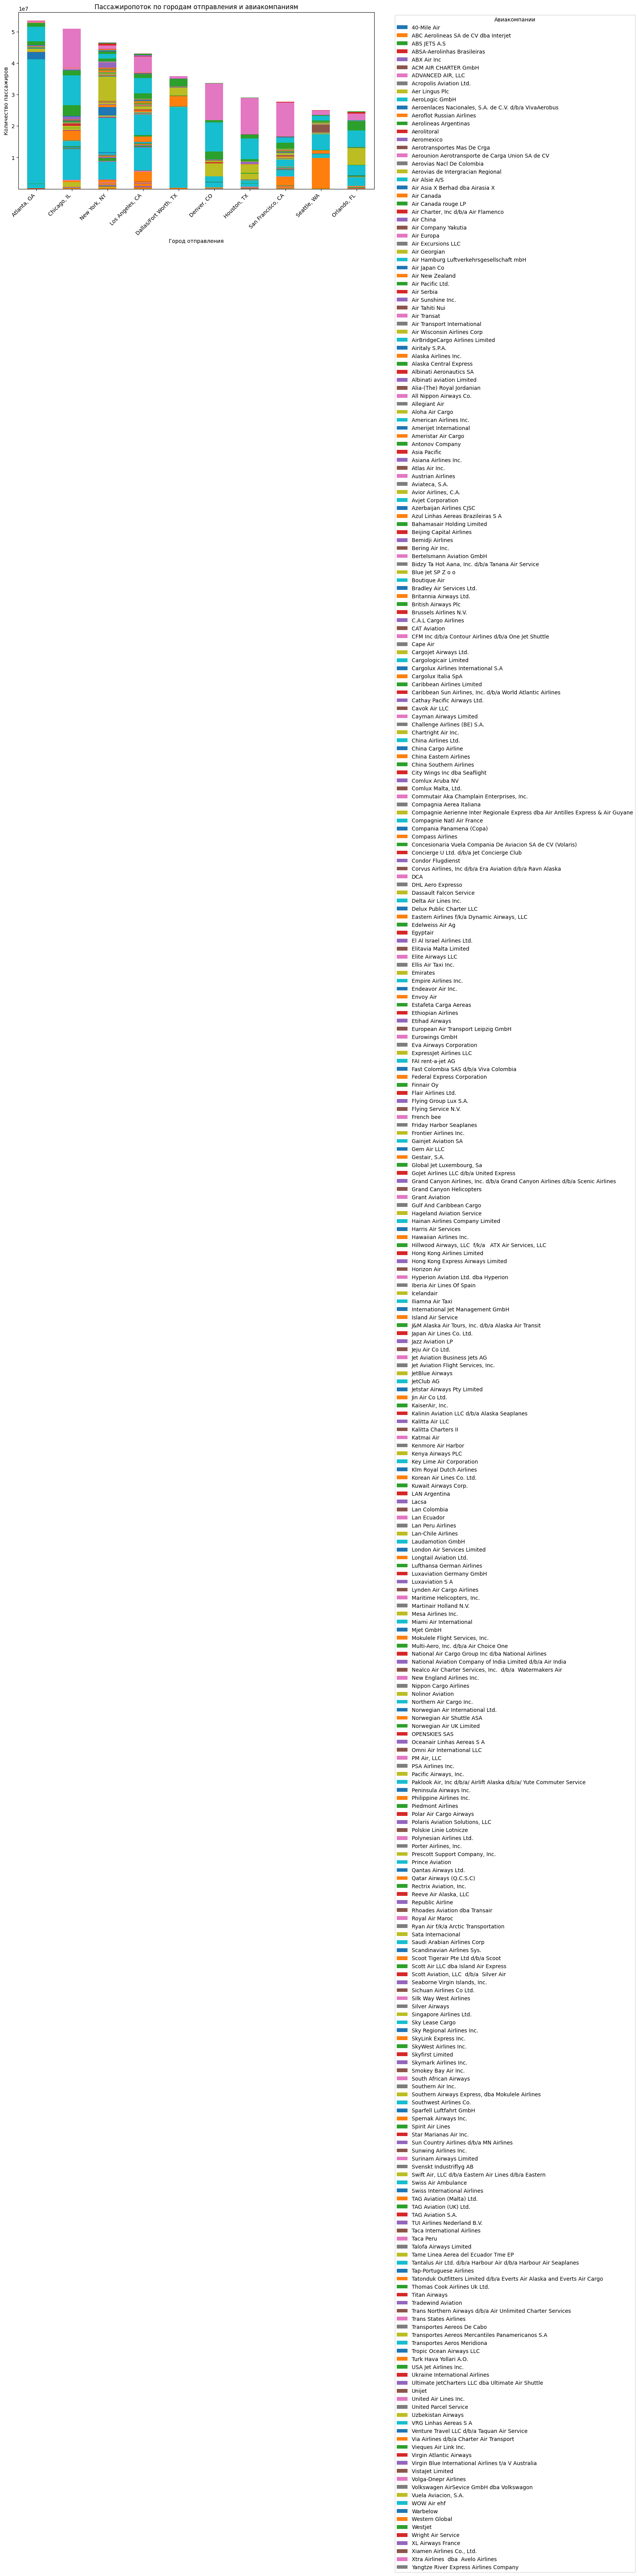

In [33]:
import matplotlib.pyplot as plt

grouped = df.groupby(['origin_city_name', 'unique_carrier_name'])['passengers'].sum().unstack().fillna(0)


top_cities = grouped.sum(axis=1).nlargest(10).index
grouped_top = grouped.loc[top_cities]


grouped_top.plot(kind='bar', stacked=True, figsize=(12, 6))


plt.title('Пассажиропоток по городам отправления и авиакомпаниям')
plt.xlabel('Город отправления')
plt.ylabel('Количество пассажиров')
plt.legend(title='Авиакомпании', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.show()